# Supermarket Dataset For Predictive Marketing
[Dataset on kaggle](https://www.kaggle.com/datasets/hunter0007/ecommerce-dataset-for-predictive-marketing-2023)

### Contents
* Data understanding and EDA
* Data preprocessing 
* Modeling
* Evaluation

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(font_scale=1.4)

# Loading Dataset

In [2]:
data = pd.read_csv('ECommerce_consumer behaviour.csv')

# Data Understanding

In [3]:
data.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [4]:
data.shape

(2019501, 12)

In [5]:
data.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


## Detect missing values and drop them

In [7]:
data.isna().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data.shape

(1895159, 12)

In [10]:
data.duplicated().sum()

0

In [11]:
data.nunique()

order_id                  187746
user_id                    98918
order_number                  99
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
dtype: int64

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1895159.0,1.707264e+06,986137.511815,10.0,852662.0,1705092.0,2560343.0,3421080.0
user_id,1895159.0,1.030471e+05,59462.563641,2.0,51625.0,102617.0,154524.0,206209.0
order_number,1895159.0,1.821107e+01,17.580281,2.0,6.0,12.0,25.0,100.0
order_dow,1895159.0,2.735071e+00,2.092352,0.0,1.0,3.0,5.0,6.0
order_hour_of_day,1895159.0,1.342840e+01,4.243730,0.0,10.0,13.0,16.0,23.0
days_since_prior_order,1895159.0,1.138603e+01,8.970980,0.0,5.0,8.0,15.0,30.0
product_id,1895159.0,7.119710e+01,38.212484,1.0,31.0,83.0,107.0,134.0
add_to_cart_order,1895159.0,8.365059e+00,7.158381,1.0,3.0,6.0,11.0,137.0
reordered,1895159.0,6.284359e-01,0.483223,0.0,0.0,1.0,1.0,1.0
department_id,1895159.0,9.931839e+00,6.283028,1.0,4.0,9.0,16.0,21.0


---
# Visualize numerical features

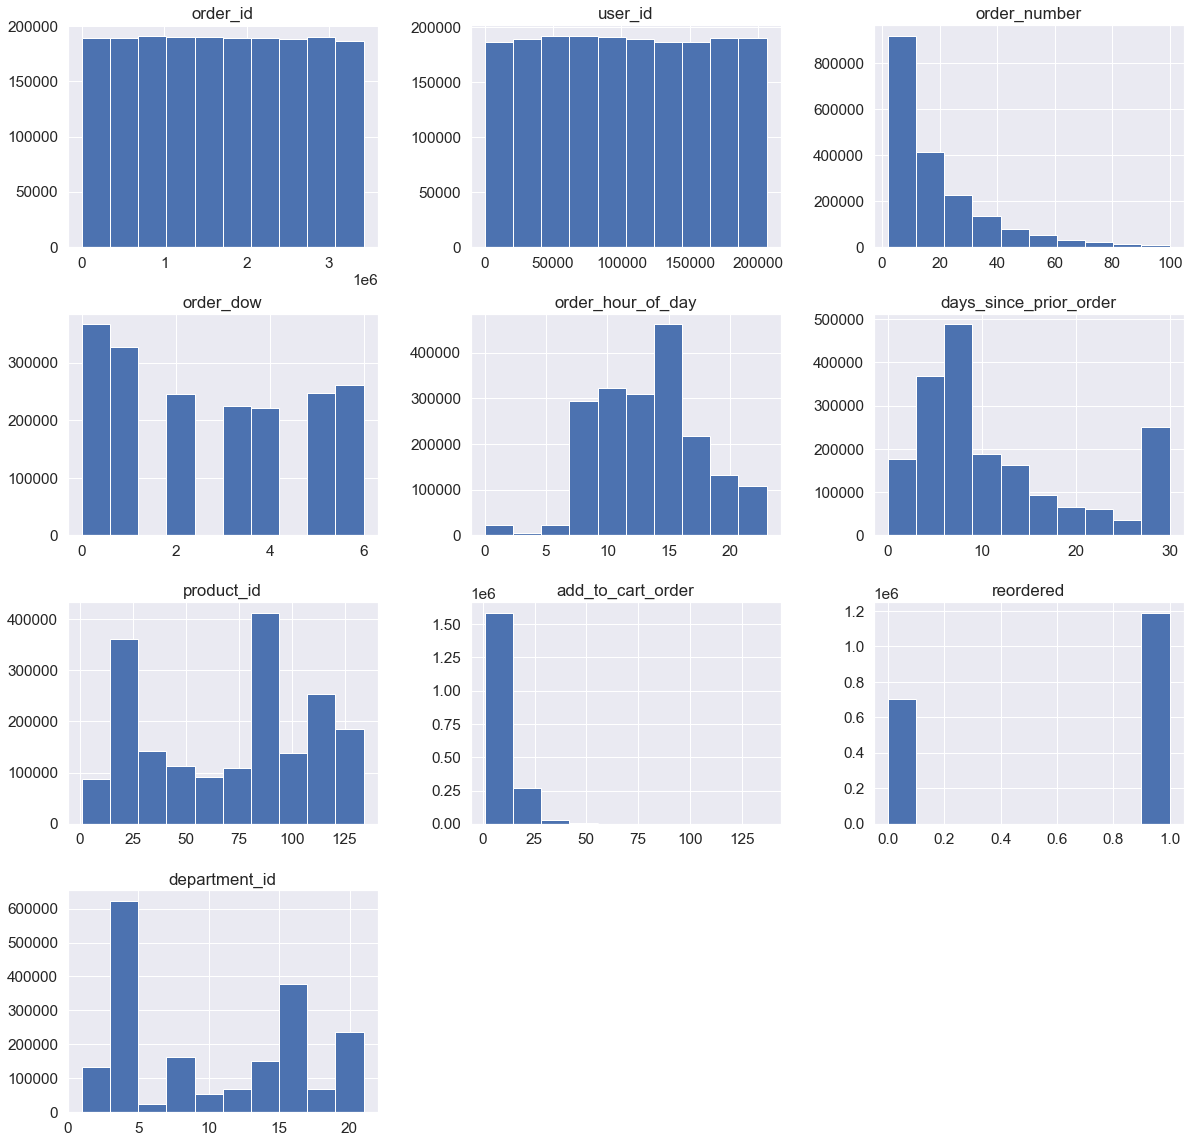

In [13]:
data.hist(figsize=(20, 20))
plt.show()

## Number of purchases by day

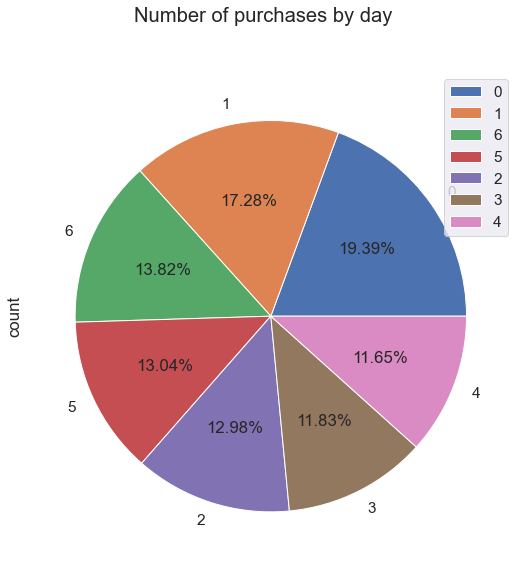

In [14]:
data.groupby('order_dow')['user_id'].agg(['count']).sort_values(by='count', ascending=False). \
    plot(kind='pie', autopct='%1.2f%%', subplots=True, title='Number of purchases by day', figsize=(9, 9))
plt.show()

# Time of day

In [15]:
def order_time(x):
    if x in [6, 7, 8, 9, 10, 11, 12]:
        return 'The order was made in the morning'
    if x in [13, 14, 15, 16, 17]:
        return 'The order was made in the afternoon'
    if x in [18, 19, 20, 21, 22]:
        return 'The order was made in the evening'
    if x in [23, 24, 0, 1, 2, 3, 4, 5]:
        return 'The order was made at night'
    return x

In [16]:
data['order_time_list'] = data['order_hour_of_day'].apply(order_time)

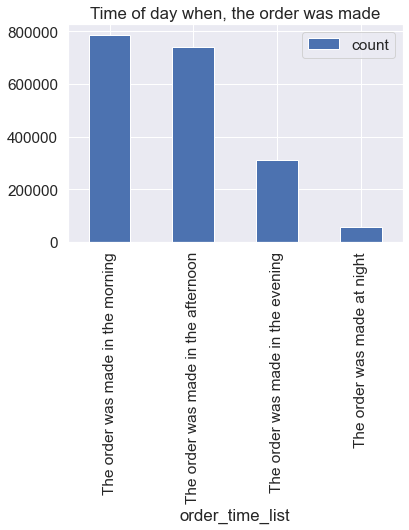

In [17]:
data.groupby('order_time_list')['user_id'].agg(['count']).sort_values(by='count', ascending=False).\
    plot(kind='bar', title='Time of day when, the order was made')
plt.show()

In [18]:
data.drop(['order_time_list'], axis=1, inplace=True)

---
# Visualize categorical features

In [19]:
def dist_graphs(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i + 1})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

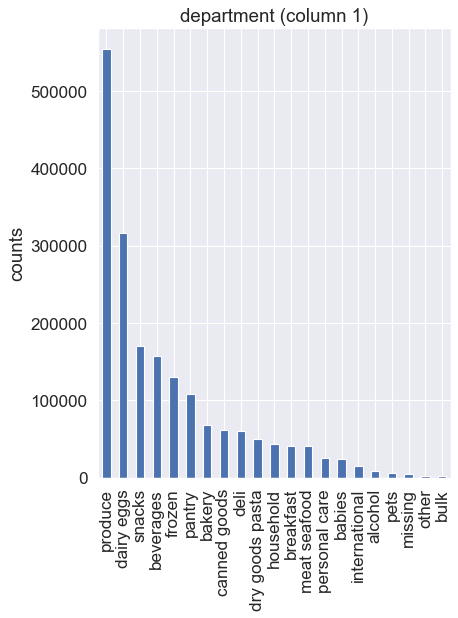

In [20]:
dist_graphs(data[['department']], 1, 1)

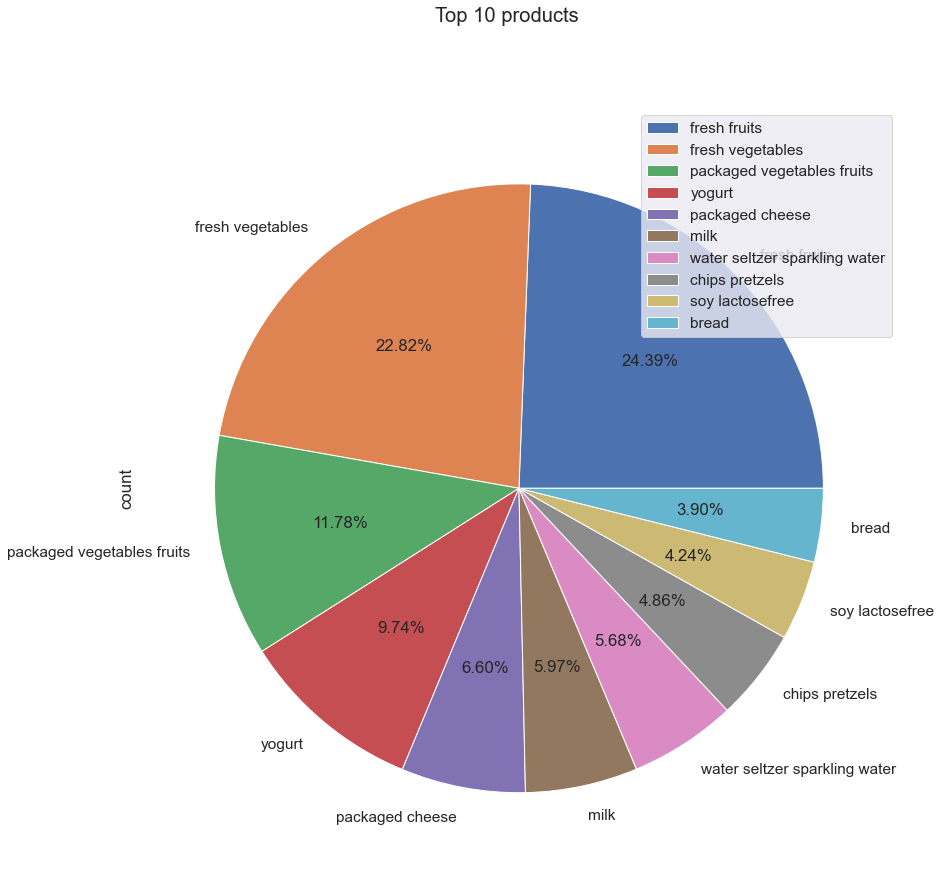

In [21]:
data.groupby('product_name')['user_id'].agg(['count']).sort_values(by='count', ascending=False).head(10).\
    plot(kind='pie', autopct='%1.2f%%', subplots=True, title='Top 10 products', figsize=(14, 14))
plt.show()

# Correlation Matrix

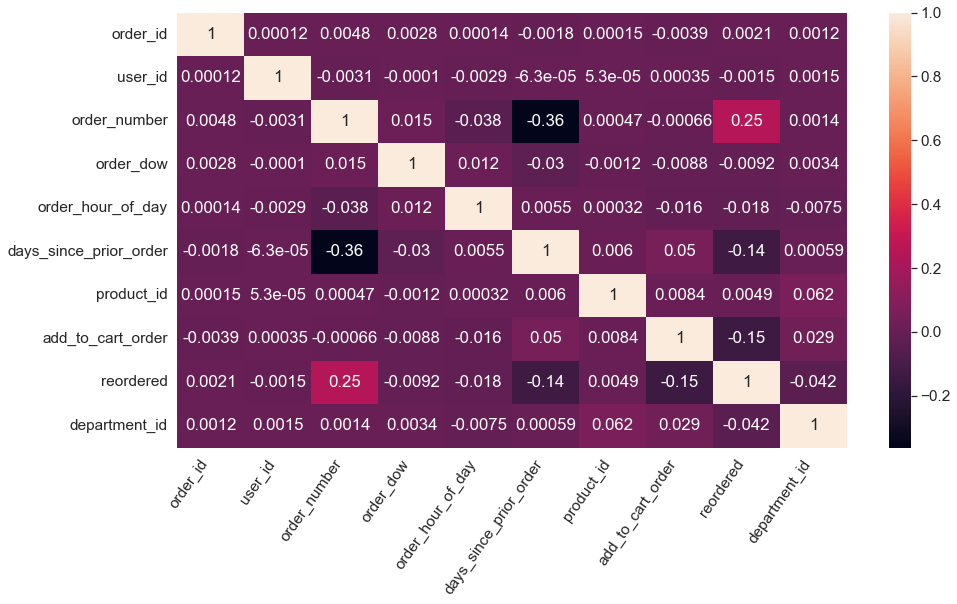

In [22]:
plt.figure(figsize=(15, 8))
dataplot = sns.heatmap(data.corr(), annot=True)
plt.xticks(rotation=55, horizontalalignment='right')
plt.show()

---
# Data Preprocessing
* Missing values
* Handling categoricals
* Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
data.drop(['department', 'product_name'], axis=1, inplace=True)

### Drop unnecessary features

In [49]:
data.drop(['order_id', 'user_id', 'order_number','product_id', 'department_id'], axis=1, inplace=True)

In [110]:
data.head()

,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered
22,0,16,3.0,1,0
23,0,16,3.0,2,0
24,0,16,3.0,3,1
25,0,16,3.0,4,1
26,0,16,3.0,5,1


In [111]:
data.shape

(1895159, 5)

In [119]:
ss = StandardScaler()

In [120]:
scaled_data = ss.fit_transform(data.sample(20000))

In [121]:
scaled_data.shape

(20000, 5)

---
# Modeling and Evaluation

In [127]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

# K-Means Clustering

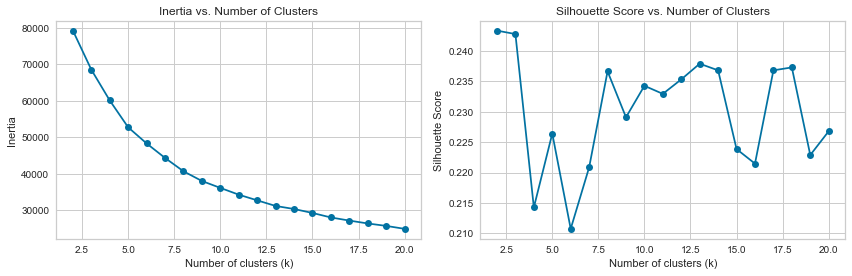

In [125]:
inertia = []
silhouette_scores = []
k_values = range(2, 21) 
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plotting inertia and silhouette score
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')

plt.tight_layout()
plt.show()

In [126]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(scaled_data)

KMeans()

In [128]:
df = pd.DataFrame(scaled_data)

In [130]:
df['Label'] = kmeans.labels_

In [131]:
df.head()

,0,1,2,3,4,Label
0,-0.828162,1.302684,-0.831351,-0.471374,0.777740,4
1,0.600319,-1.281051,-0.831351,0.649460,0.777740,1
2,0.600319,-1.515936,-0.163890,0.229147,-1.285777,5
3,-0.828162,-1.046166,0.058598,1.349981,0.777740,1
4,-1.304322,-1.046166,0.058598,-0.051061,0.777740,1


In [133]:
df['Label'].value_counts()

3    3798
1    3317
4    2786
5    2583
7    2351
2    1892
0    1815
6    1458
Name: Label, dtype: int64

In [134]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(scaled_data)

D:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


C:\Users\ACER\AppData\Local\Temp\ipykernel_5932\579505047.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Cluster')


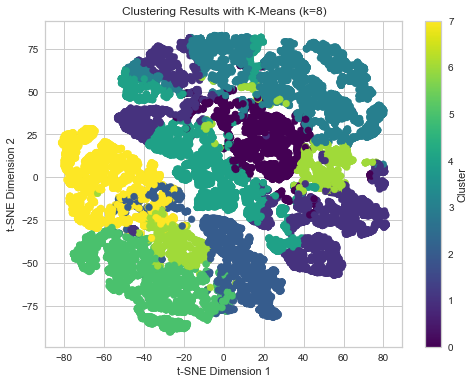

In [136]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Clustering Results with K-Means (k={})'.format(8))
plt.colorbar(label='Cluster')
plt.show()

In [137]:
silhouette_score(scaled_data, kmeans.labels_)

0.2377950353988015

In [138]:
kmeans.inertia_

40641.41419780641

# Hierarchical Clustering

In [139]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [140]:
clustering = AgglomerativeClustering(n_clusters=8)
labels = clustering.fit_predict(scaled_data)

In [141]:
silhouette_score(scaled_data, labels)

0.17166651668443136

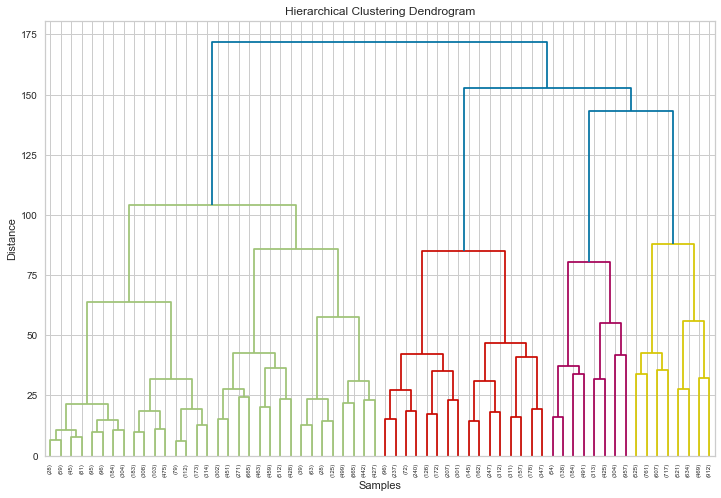

In [142]:
linkage_matrix = linkage(scaled_data, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [145]:
df['Label'] = labels
df.head()

,0,1,2,3,4,Label
0,-0.828162,1.302684,-0.831351,-0.471374,0.777740,1
1,0.600319,-1.281051,-0.831351,0.649460,0.777740,6
2,0.600319,-1.515936,-0.163890,0.229147,-1.285777,3
3,-0.828162,-1.046166,0.058598,1.349981,0.777740,0
4,-1.304322,-1.046166,0.058598,-0.051061,0.777740,2


In [146]:
df['Label'].value_counts()

6    3551
0    2866
1    2639
5    2610
3    2536
2    2488
4    1859
7    1451
Name: Label, dtype: int64

C:\Users\ACER\AppData\Local\Temp\ipykernel_5932\4286551446.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Cluster')


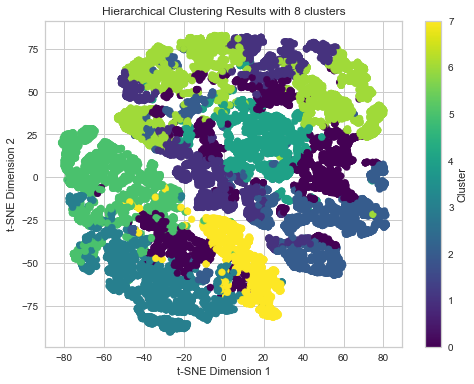

In [147]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Hierarchical Clustering Results with {} clusters'.format(8))
plt.colorbar(label='Cluster')
plt.show()

# DBSCAN

In [148]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

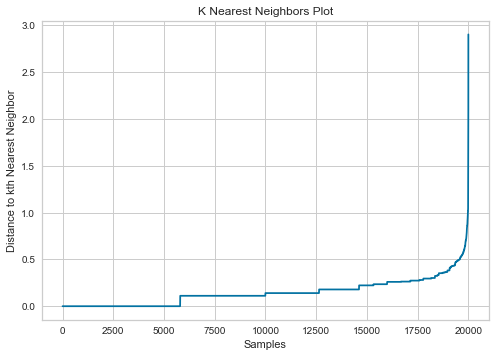

In [149]:
k = 4 
nn = NearestNeighbors(n_neighbors=k)
nn.fit(scaled_data)
distances, _ = nn.kneighbors(scaled_data)
distances = np.sort(distances, axis=0)
distances = distances[:, 1] 
plt.plot(distances)
plt.xlabel('Samples')
plt.ylabel('Distance to kth Nearest Neighbor')
plt.title('K Nearest Neighbors Plot')
plt.show()

In [169]:
eps = 2
min_samples = 4
clustering = DBSCAN(eps=eps, min_samples=min_samples)
labels = clustering.fit_predict(scaled_data)

In [170]:
silhouette_score(scaled_data, labels)

0.2425787408667185

In [171]:
df['Label'] = labels
df.head()

,0,1,2,3,4,Label
0,-0.828162,1.302684,-0.831351,-0.471374,0.777740,0
1,0.600319,-1.281051,-0.831351,0.649460,0.777740,0
2,0.600319,-1.515936,-0.163890,0.229147,-1.285777,1
3,-0.828162,-1.046166,0.058598,1.349981,0.777740,0
4,-1.304322,-1.046166,0.058598,-0.051061,0.777740,0


In [172]:
df['Label'].value_counts()

 0    12459
 1     7533
-1        4
 2        4
Name: Label, dtype: int64

C:\Users\ACER\AppData\Local\Temp\ipykernel_5932\1512964440.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Cluster')


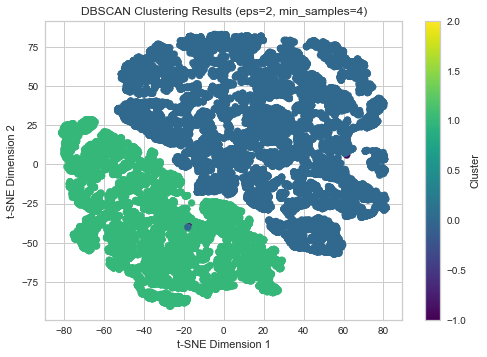

In [173]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('DBSCAN Clustering Results (eps={}, min_samples={})'.format(eps, min_samples))
plt.colorbar(label='Cluster')
plt.show()